In [19]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#%% Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
#%% Importing the dataset
#and we are  select elements of a DataFrame by their integer location
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SVMs_dataset.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [22]:
#%% Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
#%% Fitting SVM classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)

SVC()

In [25]:
#%% Predicting the Test set results
predictions = classifier.predict(X_test)

In [26]:
#%% Making the confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



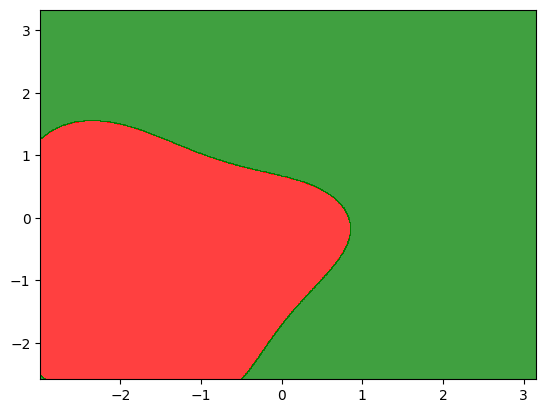

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
#Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,stop=X_set[:, 0].max() + 1,step=0.01),np.arange(start=X_set[:, 1].min() - 1,stop=X_set[:, 1].max() + 1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red', 'green')))

<ipython-input-28-41b57fba39d7>:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c=ListedColormap(('red', 'green'))(i),label=j)


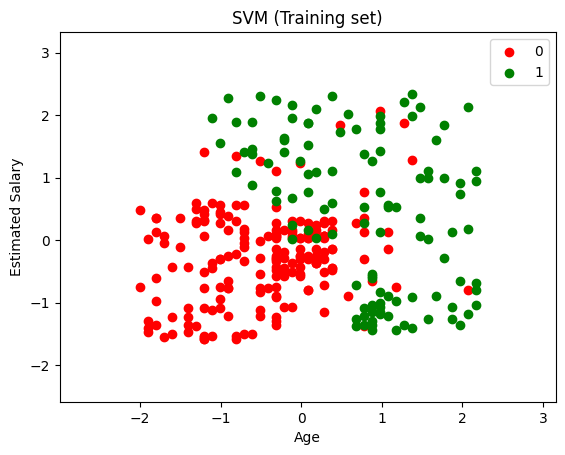

In [28]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c=ListedColormap(('red', 'green'))(i),label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [35]:
# This implementation uses the sklearn library. The use of the RBF kernel found better test set scores!
predictAge, predictSalary = input("Please type age and salary separated by a space ex '47 28000'\n").split(" ")
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SVMs_dataset.csv') #get dataset into pandas

Please type age and salary separated by a space ex '47 28000'
2 200


In [36]:
#spliting the dataset into training and testing
trainSetSize = int(len(dataset) * .8)
testSetSize = len(dataset) - trainSetSize


In [37]:
#and we are  select elements of a DataFrame by their integer location
X = dataset.iloc[:, 2:4].values #X matrix
X = X.astype(float)
y = dataset.iloc[:, 4].values #Y matrix
y = y.astype(float)

In [38]:
# Normalizing
x1max = np.max(X[:, 0])
x2max = np.max(X[:, 1])
for i in range(len(X[:, 0])):
  a = X[i, 0].astype(float)
  X[i, 0] = float(a / x1max)
for i in range(len(X[:, 1])):
  X[i, 1] = X[i, 1] / x2max

In [39]:
#we use svc(support vector clasification) and this is a supervised machine learning algorithm that can be used to classify data points into two or more classes amd this can used bu importing sklearn.svm module
clf = SVC(C=25, cache_size=400, class_weight=None, coef0=0.0,decision_function_shape='ovr',gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
clf.fit(X[:300], y[:300])

SVC(C=25, cache_size=400, gamma='auto')

In [40]:
print("SVM Algorithm test set score is %{}".format(clf.score(X[testSetSize:],
y[testSetSize:]) * 100))
if clf.predict([[predictAge, predictSalary]]) == [1]:
  print("1 - They would buy")
else:
  print("0 - They would not buy")

SVM Algorithm test set score is %88.75
1 - They would buy
